**Pyber Ride Sharing**

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle

In [169]:
path1 = 'Resources/city_data.csv'
path2 = 'Resources/ride_data.csv'
city = pd.read_csv(path1, low_memory=False)
rides = pd.read_csv(path2, low_memory=False)
#Port James double. suburban, total 18 dr

**Create an organized DF from the city file and get Total Number of Drivers Per City and
City Type (Urban, Suburban, Rural)**

In [170]:
city_group = city.groupby(['city', 'type'])
city_group_df = city_group.sum()
struct_city = city_group_df.reset_index()
#struct_city.head()

**Get Average Fare ($) Per City**

In [171]:
rides_gr = rides.groupby('city')
fare_df = rides_gr.mean()
fare_df.drop('ride_id', axis=1, inplace=True)
fare = fare_df.reset_index()
#fare.head()

**Get Total Number of Rides Per City**

In [172]:
total_rides = rides_gr.count()
total_rides.drop('fare', axis=1, inplace=True)
total_rides.drop('date', axis=1, inplace=True)
tot_rides = total_rides.reset_index()
#tot_rides.head()

**Merge all 3 DF in one**

In [195]:
merge1 = pd.merge(struct_city, fare, on='city')
allmerged = pd.merge(merge1, tot_rides, on='city')
allmerged.drop('city', axis=1, inplace=True)
allmerged.columns = ['City Type', 'Driver Count', 'Average Fare ($)', 'Number of Rides']
#allmerged['Average Fare'] = allmerged['Average Fare'].map("{:,.2f}".format)

In [196]:
# Create a copy to do whatever I want with it
forplot = allmerged.copy()
forplot.head()

,City Type,Driver Count,Average Fare ($),Number of Rides
0,Urban,21,23.928710,31
1,Urban,67,20.609615,26
2,Suburban,16,37.315556,9
3,Urban,21,23.625000,22
4,Urban,49,21.981579,19


In [193]:
citytype = {}
counter = 0
colorcycle = cycle('boycrg')
for i in forplot['City Type']:
    citytype[i] = next(colorcycle)
    counter +=1
citytype

{'Rural': 'g', 'Suburban': 'b', 'Urban': 'r'}

In [187]:
colors = []
colorcounter = 0
for i in forplot['City Type']:
    if i in citytype:
        colors.append(citytype[i])
    colorcounter += 1

In [188]:
#forplot = forplot.assign(Color= '')
# Add copy of allmerged and work with it
#x = 0
#for i in forplot['City Type']:
    #if (i == 'Urban'):
        #forplot.set_value(x, 'Color', 'red')
    #elif (i == 'Suburban'):
        #forplot.set_value(x, 'Color', 'yellow')
    #else:
        #forplot.set_value(x, 'Color', 'green')
    #x +=1

**Create a plot**

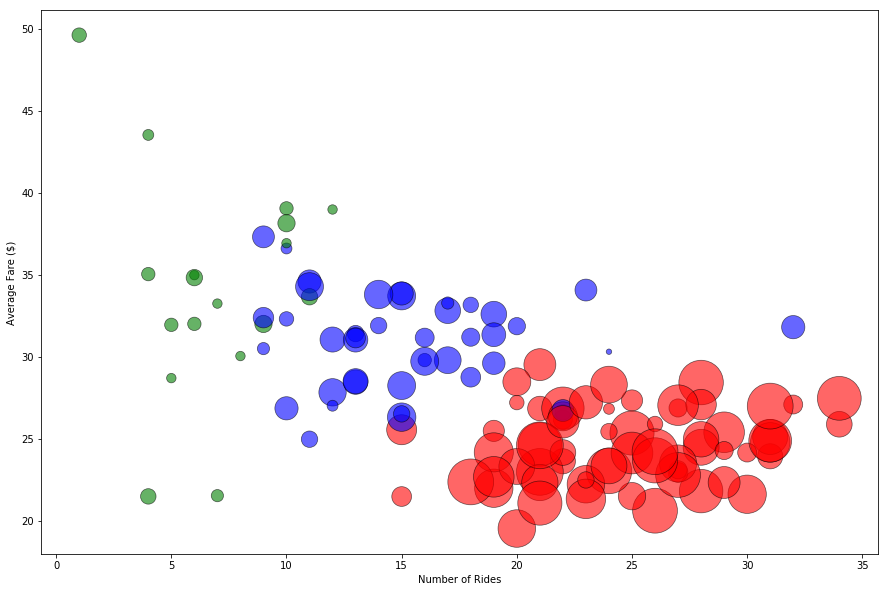

In [190]:
bubble = forplot.plot(kind='scatter', x='Number of Rides', y='Average Fare ($)', s=(forplot['Driver Count']*30),
                        c=colors, alpha=0.6, edgecolors="black", linewidth=0.7, figsize=(15,10))